### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###

# Financial Factor Analysis #

### Tyler Behle

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Email: tbehle@wisc.edu  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Student ID Number: 9072599682  
### Mitchel Berg
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Email: mberg9@wisc.edu  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Student ID Number: 9072092852  
### Christian Colomb
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Email: ccolumb@wisc.edu  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Student ID Number: 9074912750  
### Mike Osmian
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Email: osmian@wisc.edu  
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Student ID Number: 9073922677  

### Table of Contents

1. [Introduction](#1.-Introduction)
    1. [Data Creations](#1.A.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Model Overview](#2.A.-Model Overview)
    2. [Parameters](#2.B.-Parameters)
    3. [Variables](#2.C.-Variables)
    4. [Constraints](#2.D.-Constraints)
    5. [Objective Functions](#2.E.-Objective Functions)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The goal of our project is to use various regression techinques to determine the most indicative subset of financial factors that influence returns. In fields such as quantitative finance, this is a very important part in creating automated trading algorithms because the most predictive factors in an asset price allow opportunities for profit generation. To accomplish the goal of finding the most predictive subset of factors in an asset's returns we first generated synthetic data that simulates the performance of an asset over time. Then, we used this data in multiple different regression models to find the optimal subset that influences returns. Next, we will outline the process for synthetically generating data in which our models use. 

### 1.A. Data Creation

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The first step in this project was to create synthetically generated time series data for factor values and their corresponding returns for our model to use. The factor and return values are represented as a percentage change per time step. This time step can be pictured as any increment in a series such as minute, hour or day. We decided to generate one hundred different factor values and two thousand time steps to base our models upon. Below are the decisions and assumptions made when creating this data:

* **Factors**: There are one hundred different factors and each factor's percentage change over a time step follows a normal distribution where the  standard deviation is sampled from the sum of both normal and uniform distributions because it allows for greater variability and potential for extreme values. 

<br>

* **Percent Changes:** Every factor has a corresponding list of percentage changes at each time step. In order to make our data more representative, we built covariance between factors by randomly choosing subsets of factors and weighting them together. We also decided to add random periodic jumps in our percentage change values to represent the idiosyncratic jumps that a market creates. We did this by iterating through all of the factors and choosing random time ticks via a poisson sample and adding a value sampled from the normal distribution.

<br>

* **Returns:** The percentage change in the return column is calculated as a linear combination of the percentage changes for each factor. We sampled a value from a normal distribution for each weight assocuiated to each factor component to calculate the return. The standard deviation used to sample from the normal distribution, where we the weight is caclulated, increases with the factors.



&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; We created a python script that generates the synthetic data and outputs a csv file that can be read into our Julia code. Below is the detailed and commented python script. 

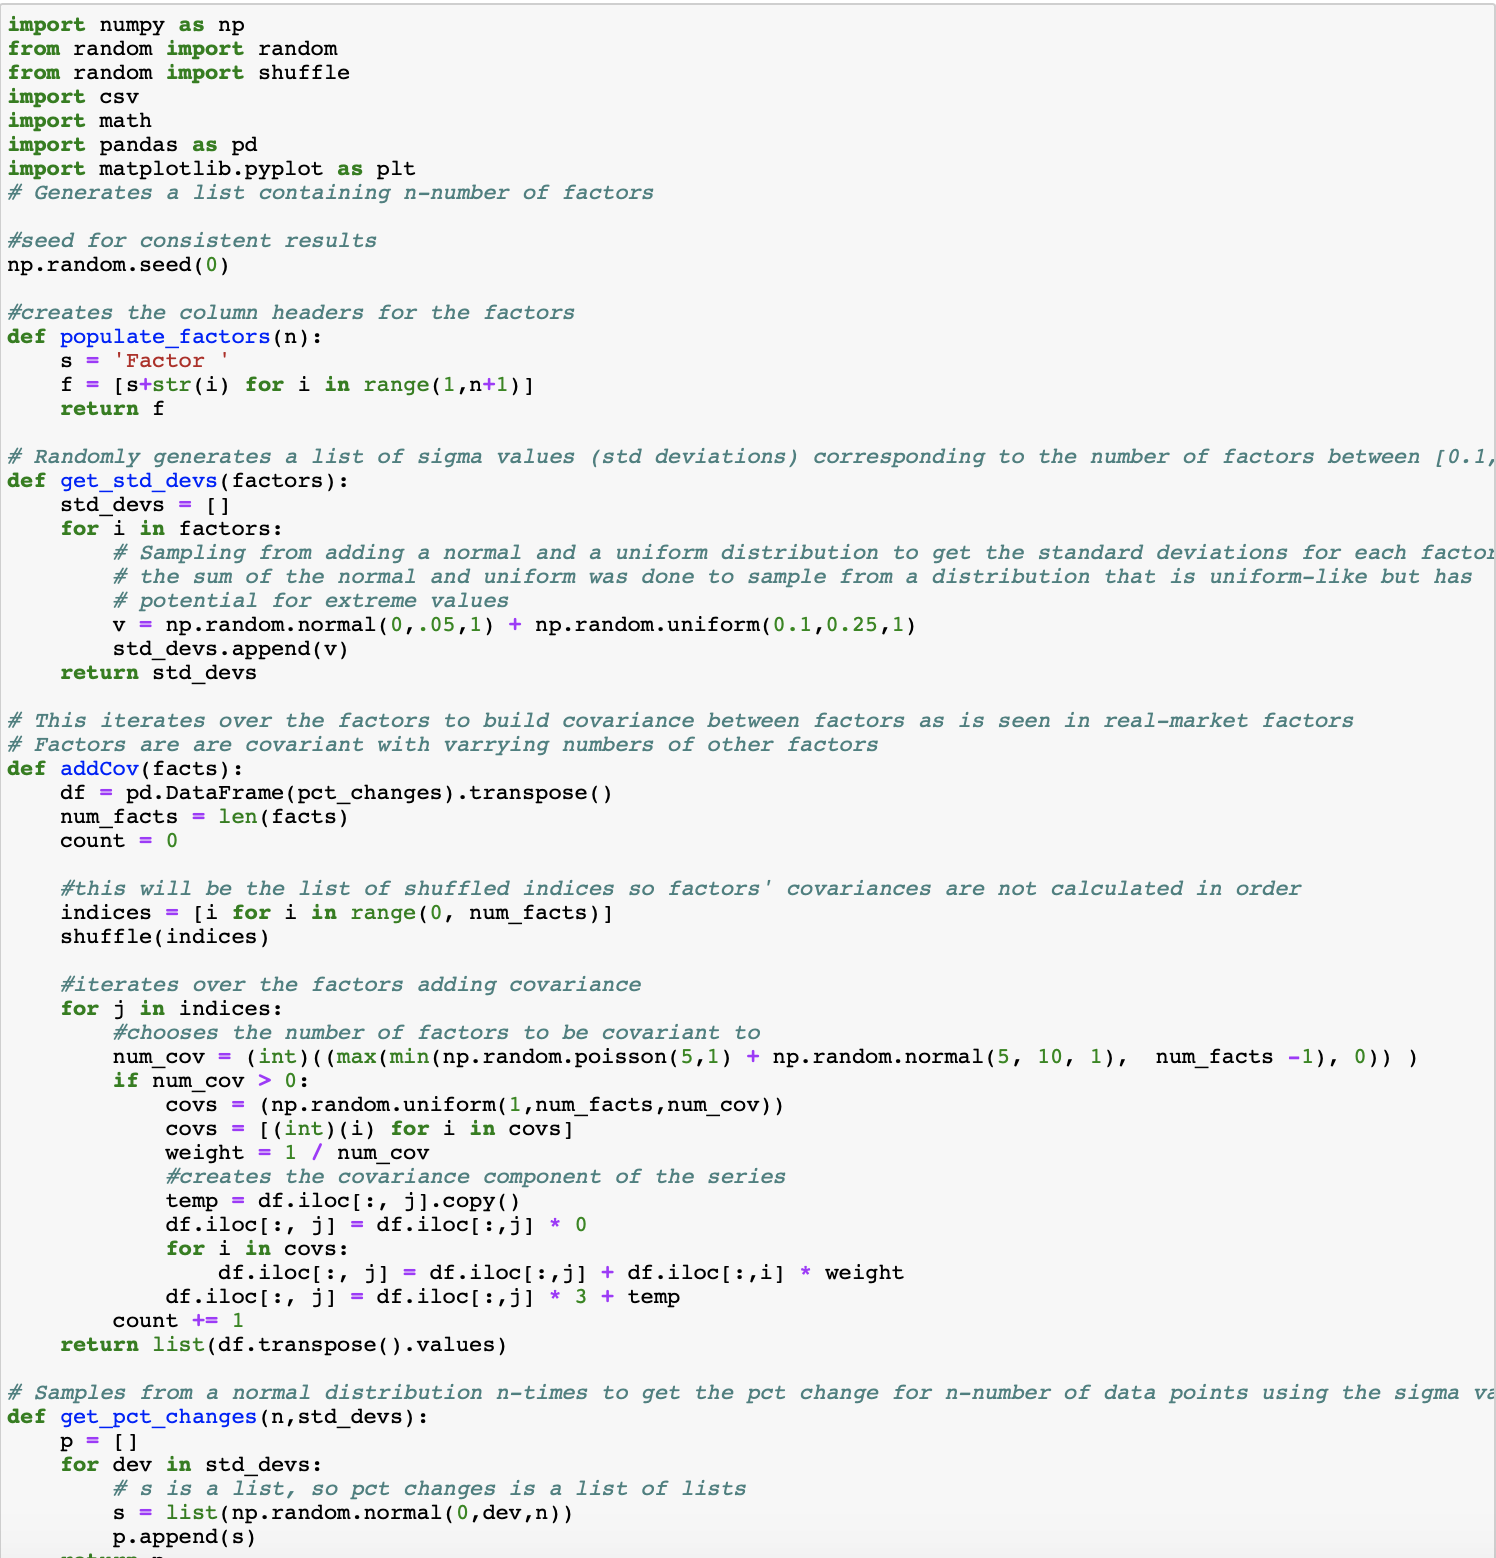
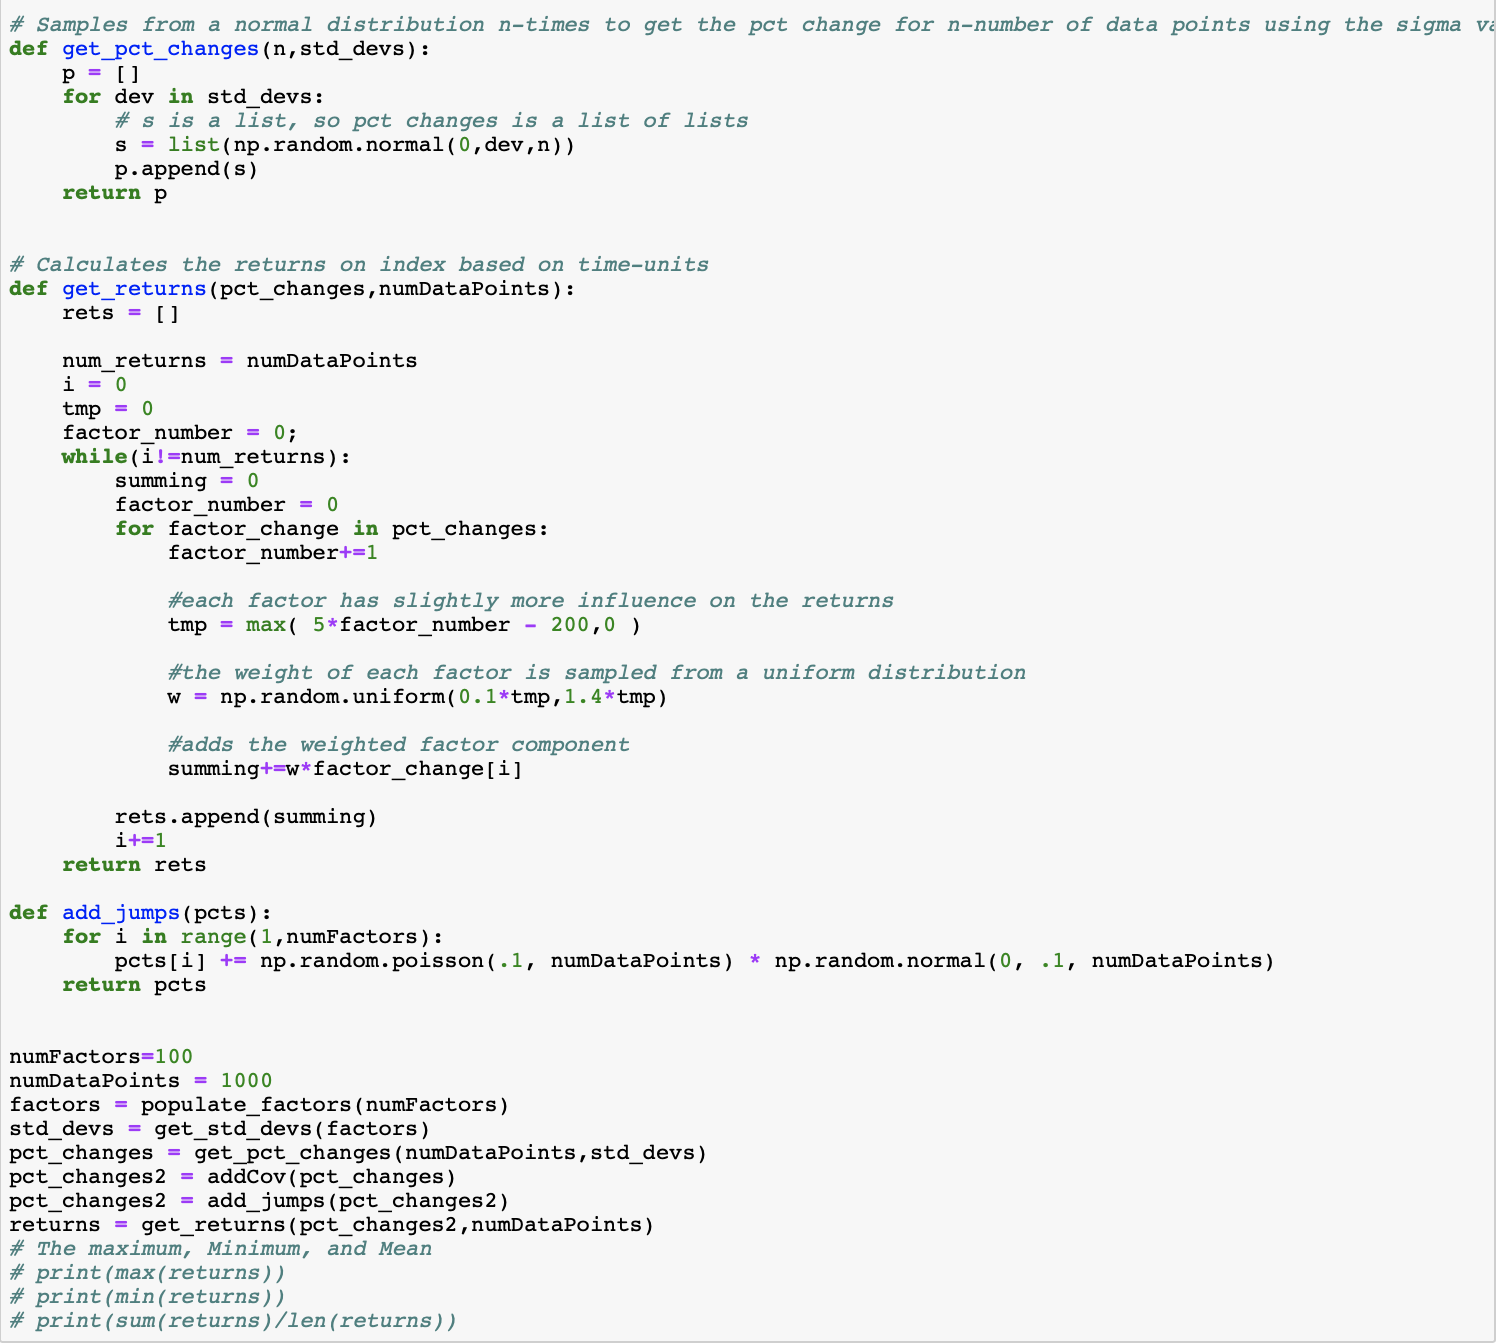


## 2. Mathematical model ##

### 2.A. Model Overview

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Our problem's model is linear.  It analyzes 100 financial factors to establish the best combination of factors to observe when investing in a company.  In order to most effectively track our model's results we generated and minipulated parts of our data set to see how the model reacts to changes and relationships between factor data.

### 2.B. Parameters

$$\begin{aligned}
    \text{Parameters:}\qquad& \lambda = 0.01 && \text{Regularization Tradeoff Parameter}\\
    & \mu = 0.00001 && \text{Regularization Tradeoff Parameter}\\
    & n = 100 && \text{Number of Factors}\\
    & d = 10000 && \text{Number of Data Points Per Factor}\\
    & data_{n,d} && \text{n by d Matrix of Each Data Point}\\
    & rets_d && \text{Array Containing the Returns at Each Data Point}\\
    \end{aligned}$$

### 2.C. Variables

$$\begin{aligned}
    \text{Variables:}\qquad& b_i && i=1,\dots,n && \text{Weight Given to Each Factor}\\
    & yt_i && i=1,\dots,d && \text{Placeholder Variable for Logic Constraints}\\
    & t_i && i=1,\dots,n && \text{Absolute Value of } b_i\\
    & maxt && && \text{Largest } t_i \text{ Value}\\
    \end{aligned}$$

### 2.D. Constraints

$$\begin{aligned}
    \text{All Objective Functions Are Subject To:}\qquad& yt_i = b_i \cdot data[i,:] && i=1,\dots,d && \text{(1)}\\
    & t_i \ge b_i && i=1,\dots,n && \text{(2)}\\
    & t_i \ge -b_i && i=1,\dots,n && \text{(3)}\\
    & maxt \ge t_i && i=1,\dots,n && \text{(4)}\\
    \end{aligned}$$

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The first constraint sets $yt_i$ equal to the variable $b_i$ multiplied (using dot product) to the data associated data from our generated CSV file.  This constraint esablishes the variable $yt_i$ to be compared to the returns data within our regression models below. 

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Constraints (2) and (3) establish the variable $t_i$ as the absolute value of variable $b_i$ using logic.  Since $t_i$ must be greater than or equal to $b_i$ while still being greater than or equal to $-b_i$, the only value it can take is the possitive value of $b_i$.  We need these constraints and the variable $t_i$ for our LASSO regressions seen in objective functions 

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The last constraint sets the variable maxt equal to the largest value of $t_i$ within our model.  This is necessary for running our L$_\infty$ regularization in our models below.

### 2.E. Objective Functions

$$\begin{aligned}
     & \underset{x \in \mathbb{R^n}}{\text{Minimize}}\qquad& f_1(x) = \sum_{i=1}^{d}(rets - yt_i)^2 + \lambda * maxt + \mu * \sum_{i=1}^{n}t_i && \text{(1) LASSO with } L_\infty \text{ Regularization}\\
     & \underset{x \in \mathbb{R^n}}{\text{Minimize}}\qquad& f_2(x) = \sum_{i=1}^{d}(rets - yt_i)^2 + \mu * maxt && \text{(2) } L_\infty \text{ Regularization}\\
     & \underset{x \in \mathbb{R^n}}{\text{Minimize}}\qquad& f_3(x) = \sum_{i=1}^{d}(rets - yt_i)^2 + \lambda * \sum_{t=1}^{n}t_i && \text{(3) LASSO} \\
     & \underset{x \in \mathbb{R^n}}{\text{Minimize}}\qquad& f_4(x) = \sum_{i=1}^{d}(rets - yt_i)^2 + \lambda * \sum_{b=1}^{n}b_i^2 && \text{(4) } L_2 \text{ Regularization}\\
     & \underset{x \in \mathbb{R^n}}{\text{Minimize}}\qquad& f_5(x) = \sum_{i=1}^{d}(rets - yt_i)^2  && \text{(5) Least Squares} \\
    \end{aligned}$$

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Out of curiosity, we chose to analyze a number of different regression approaches in order to see how their results  differ when compared to one another.  In each case, the model's returns are compared against an array of returns to determine the difference in results. Explanations of each of our models can be found below.

(1) Our first objective funciton is a LASSO with $L_\infty$ regularization. The purpose of a lasso regression is to sparsify the solution. It does this by taking the sum of all of the coefficients for $b_i$ times a regularization parameter.  Doing this produces a smaller number of selected factors to be analyzed.  The purpose of an $L_\infty$ regression is to equalize the solution. This forces the coefficient values to all remain closer together.  By combining the LASSO and $L_\infty$ regression models we are sparsifying the number of factors we select while also keeping our coefficients closer to each other.

(2) Our second objective function is strictly an $L_\infty$ regularization. It has less of a correction for the coefficient values than the first model.

(3) Our third objective function is strictly the LASSO portion of the first model.

(4) The fourth objective function uses ridge regularization ($L_2$) to generate our list of useful factors.  The purpose of a ridge regression is to smooth the solution. This is done by taking the sum of each coefficient and squaring it then multiplying by a regularization parameter.

(5) Our fifth objective function uses a simple least squares model with no regularization parameters.

## 3. Solution ##

The goal of this project is to identify which regression technique is most effective at stock market factor selection for predicting returns.

So, to figure this out multiple types of regressions were performed on simulated market data. Because this is ultimately a classification problem (factors are selected or not selected), but regressions are performed on a continuous space, a coefficient cutoff is set (at +/- .005) where any coefficient "near-zero" shows the factor not being selected.

First, a large number of each regression are done with varying mu values to get an idea of how many factors each regression type is choosing dependent on the parameter. This is plotted to get a visual understanding of this relationship.

Then, the cumuluative sum of coefficients over the regressions is plotted to see how each regression is choosing factors over this large set of mu values. Based on how the data is simulated, it is known that higher numbered factors have a larger influence on returns, so the best regression techniques should show larger sums for cumulative coefficients for higher numbered factors and small sums for lower numbered coefficients.

Using this, a single mu value is chosen for the remainder of the experiment to delve further into the relationships of the regressions rather than the parameters.

A regression of each type is run with the given mu value. The error, number of factors chosen by each regression, and a visual of coefficients are examined to determine which regression technique is most suitable for factor selection.



### 3.1 Implementing the Regression Techniques

These code blocks follow similar structure where they set up each type of regression technique listed in the mathematical model. Then over different values of $\mu$ it returns a count of the number of times a factor has been chosen.

### 3.1.A : LASSO with $L_\infty$ Regularization

Here we are implementing the LASSO with $L_\infty$ Regularization. 

In [86]:
#This cell sets up the functions for each type of regression that we ran
using JuMP, Gurobi, PyPlot

#used for the LASSO-LINF regression
function getCount_lasso_linf(mu, lambda, rets, num_dates, num_factors, cols,factor_cts)
    m = Model(solver = GurobiSolver(OutputFlag = 0))

    @variable(m, b[1:num_factors])
    @variable(m, yt[1:num_dates])
    @variable(m, t[1:num_factors])
    @variable(m, maxt)
    @constraint(m, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
    @constraint(m, t .>= b)
    @constraint(m, t .>= -b)
    @constraint(m, [i in 1:num_factors], maxt >= t[i])
    @objective(m, Min, sum( (rets - yt).^2 ) + 0.5 * mu * maxt + 0.5 * mu * sum(t)) #LASSO with L-Infinite Regularization

    solve(m)

    #This determines which factors have been chosen and counts that as well as cummulative sums for coef.'s
    selection = []
    bs = getvalue(b)
    count = 0
    for i in 1:length(bs)
        
        if abs(bs[i]/sum(bs)) > 0.005
            count += 1
            push!(selection, i)
            cols[i] += bs[i]/sum(bs)
            factor_cts[i] += 1
        end
    end
    return count
end
;

### 3.1.B : $L_\infty$ Regularization

Here we are implementing the $L_\infty$ Regularization.

In [87]:
using JuMP, Gurobi, PyPlot

#LINF regression
function getCount_linf(mu, lambda, rets, num_dates, num_factors, cols,factor_cts)
    m = Model(solver = GurobiSolver(OutputFlag = 0))

    @variable(m, b[1:num_factors])
    @variable(m, yt[1:num_dates])
    @variable(m, t[1:num_factors])
    @variable(m, maxt)
    @constraint(m, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
    @constraint(m, t .>= b)
    @constraint(m, t .>= -b)
    @constraint(m, [i in 1:num_factors], maxt >= t[i])
    @objective(m, Min, sum( (rets - yt).^2 ) + 1*mu * maxt) #L-Infinite Regularization

    solve(m)

    #This determines which factors have been chosen and counts that as well as cummulative sums for coef.'s
    selection = []
    bs = getvalue(b)
    count = 0
    for i in 1:length(bs)
        if abs(bs[i]/sum(bs)) > 0.005
            count += 1
            push!(selection, i)
            cols[i] += bs[i]/sum(bs)
            factor_cts[i] +=1
        end
    end
    
    return count
end
;

### 3.1.C : LASSO Regularization

Here we are implementing the LASSO Regularization.

In [88]:

#LASSO regression
function getCount_lasso(mu, lambda, rets, num_dates, num_factors, cols,factor_cts)
    m = Model(solver = GurobiSolver(OutputFlag = 0))

    @variable(m, b[1:num_factors])
    @variable(m, yt[1:num_dates])
    @variable(m, t[1:num_factors])
    @variable(m, maxt)
    @constraint(m, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
    @constraint(m, t .>= b)
    @constraint(m, t .>= -b)
    @constraint(m, [i in 1:num_factors], maxt >= t[i])
    @objective(m, Min, sum( (rets - yt).^2 ) + mu * sum(t)) #LASSO

    solve(m)

    #This determines which factors have been chosen and counts that as well as cummulative sums for coef.'s
    selection = []
    bs = getvalue(b)
    count = 0
    for i in 1:length(bs)
        if abs(bs[i]/sum(bs)) > 0.005
            count += 1
            push!(selection, i)
            cols[i] += bs[i]/sum(bs)
            factor_cts[i] +=1
        end
    end
    
    return count
end
;


### 3.1.D : $L_2$ Regularization

Here we are implementing the $L_2$ Regularization.

In [89]:
#L2 regression
function getCount_l2(mu, lambda, rets, num_dates, num_factors, cols,factor_cts)
    m = Model(solver = GurobiSolver(OutputFlag = 0))

    @variable(m, b[1:num_factors])
    @variable(m, yt[1:num_dates])
    @variable(m, t[1:num_factors])
    @variable(m, maxt)
    @constraint(m, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
    @constraint(m, t .>= b)
    @constraint(m, t .>= -b)
    @constraint(m, [i in 1:num_factors], maxt >= t[i])
    @objective(m, Min, sum( (rets - yt).^2 ) + lambda * sum(b.^2))

    solve(m)

    #This determines which factors have been chosen and counts that as well as cummulative sums for coef.'s
    selection = []
    bs = getvalue(b)
    count = 0
    for i in 1:length(bs)
        if abs(bs[i]/sum(bs)) > 0.005
            count += 1
            push!(selection, i)
            cols[i] += bs[i]/sum(bs)
            factor_cts[i] += 1
        end
    end
    
    return count
end
;

### 3.1.D: Running the Regressions

This code block runs the regressions that are implemented in the functions above on our data set. It iterates over $\mu$ values and stores the counts that are returned to be plotted

Setting up the data to be used, along with lambda and Mu values

In [90]:
#retrieves and orders the data into data structures
rets = readcsv("./returns.csv")
rets = rets[2:length(rets[:,1]), 2]

data = readcsv("./percent_changes.csv")
dates = data[2:length(data[:,1]), 1] #extract date column
data = data[:, 2:length(data[1,:])]
cols = data[1,:] #extract column titles
data = data[2:length(data[:,1]),:] #remove column titles

data = convert(Array{Float64},data)
rets = convert(Array{Float64},rets)

num_factors = length(data[1,:])
num_dates = length(dates)


# sets parameters
lambda = 100
mus = logspace(-2,5,50)
cols_count = [0 for i in cols]
;

Now we run the regressions and collect the cumulative factor counts to be plotted

In [91]:
# runs the lasso-linf regressions
cols_count_lasso_linf = [0.0 for i in cols]
num_selected_1 = []
l_inf_factor_cts = [0 for i in 1:length(cols)]
for mu in mus
    push!(num_selected_1, getCount_lasso_linf(mu, lambda, rets, num_dates, num_factors, cols_count_lasso_linf,l_inf_factor_cts))
end

# runs the lass regressions
cols_count_lasso = [0.0 for i in cols]
num_selected_2 = []
lass_factor_cts = [0 for i in 1:length(cols)]
for mu in mus
    push!(num_selected_2, getCount_lasso(mu, lambda, rets, num_dates, num_factors, cols_count_lasso,lass_factor_cts))
end

# runs the L2 regressions
cols_count_l2 = [0.0 for i in cols]
num_selected_3 = []
l2_factor_cts = [0 for i in 1:length(cols)]
for mu in mus
    push!(num_selected_3, getCount_l2(mu, lambda, rets, num_dates, num_factors, cols_count_l2,l2_factor_cts))
end

# runs the L-inf regressions
cols_count_linf = [0.0 for i in cols]
num_selected_4 = []
l_infinity_only_factor_cts = [0 for i in 1:length(cols)]
for mu in mus
    push!(num_selected_4, getCount_linf(mu, mu, rets, num_dates, num_factors, cols_count_linf,l_infinity_only_factor_cts))
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

### 3.1.E : Plotting the Results

Here we have a plot representing number of factors selected for each regression technique across all of the $\mu$ values iterated over

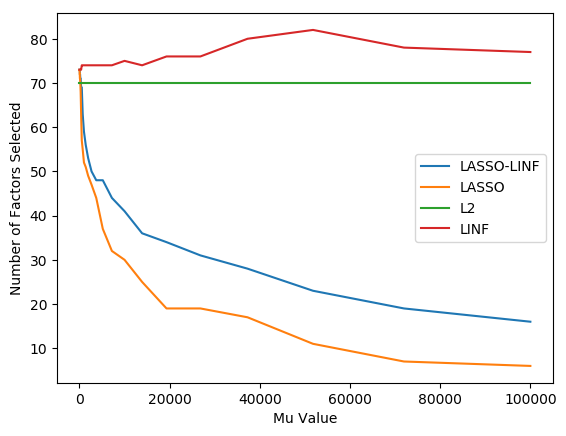

In [92]:
PyPlot.plot(mus, num_selected_1, label = "LASSO-LINF")
PyPlot.plot(mus, num_selected_2, label = "LASSO")
PyPlot.plot(mus, num_selected_3, label = "L2")
PyPlot.plot(mus, num_selected_4, label = "LINF")
PyPlot.xlabel("Mu Value")
PyPlot.ylabel("Number of Factors Selected")
PyPlot.legend()
;



This plot represents the cumulative sum of coeffecients over the various values of $\mu$ and plots them to their corresponding factor number. 

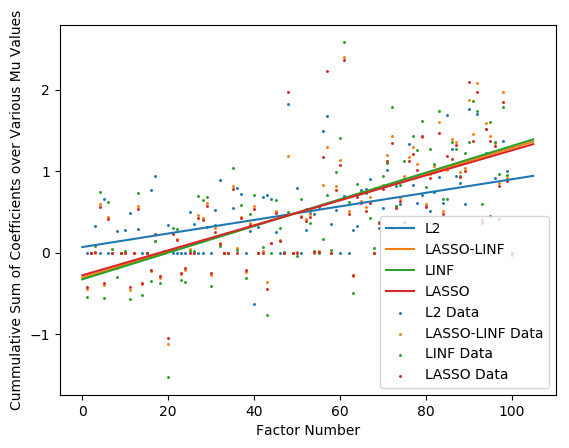

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [93]:

function cum_coeff(cols, lbl)
    PyPlot.scatter([i for i in 1:100], cols, label = string(lbl, " Data"), marker = ".", s = 5)
    x = [i for i in 1:100]
    m1 = Model(solver = GurobiSolver(OutputFlag = 0))
    @variable(m1, b1)
    @variable(m1, b0)
    @variable(m1, y[1:100])
    @constraint(m1, y .== b1*x + b0)
    @objective(m1, Min, sum((y - cols).^2))
    solve(m1)
    
    b1s = getvalue(b1)
    b0s = getvalue(b0)
    t = linspace(0, 105, 150)
    vals = []
    for i in t
        push!(vals,(i*b1s + b0s))
    end
    PyPlot.plot(t, vals, label = lbl)
end


# PyPlot.bar([i for i in 1:100],cols_count_l2)
# PyPlot.bar([i for i in 1:100],cols_count_lasso)
# PyPlot.bar([i for i in 1:100],cols_count_linf)
# PyPlot.bar([i for i in 1:100],cols_count_lasso)


cum_coeff(cols_count_l2, "L2")
cum_coeff(cols_count_lasso_linf, "LASSO-LINF")
cum_coeff(cols_count_linf, "LINF")
cum_coeff(cols_count_lasso, "LASSO")

PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Cummulative Sum of Coefficients over Various Mu Values")
PyPlot.legend()
;


Bar charts visualize this data better individually because they are counts but above it is represented as a scatter plot for more concise visualization. This allows us to see everything on one plot at once. In this discussion the individual charts will be included.

### 3.2.A : Choosing a Unique $\mu$ Value

Looking at the previous plot, and knowing that higher numbered factors should have larger coefficients, it is clear that the LASSO, L-Inf, and LASSO + L-Inf regressions are better than the L2 regression.

Here, we set the mu value to 10,000 because the first plot shows a discrepency in number of factors chosen based on regression. The LASSO and LASSO + L-Inf regressions are choosing about 30 factors which, from our background in quantitative finance, is a suitable number of factors to use to predict an asset's returns.

We want to see regressions which don't assign coefficients to lower numbered factors but assign coefficients to higher numbered factors, have low relative errors, and select a small subset of the factors for coefficients of acknowledgable magnitude.

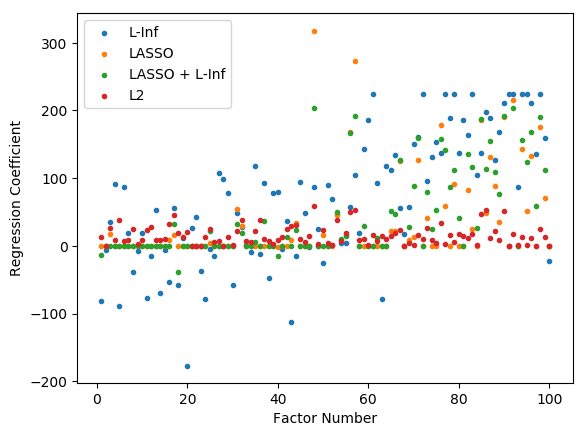

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only

L-Inf error:	4.8342488441007e7
L-Inf chose:	75 factors

LASSO error:	6.1848597109477356e7
LASSO chose:	30 factors

LASSO + L-Inf error:	5.51524970487787e7
LASSO + L-Inf chose:	30 factors

L2 error:	6.502878489250455e8
L2 chose:	68 factors



PyObject <matplotlib.legend.Legend object at 0x140a5c438>

In [94]:
mu = 10000

#LINF
linf = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(linf, b[1:num_factors])
@variable(linf, yt[1:num_dates])
@variable(linf, t[1:num_factors])
@variable(linf, maxt)
@constraint(linf, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
@constraint(linf, t .>= b)
@constraint(linf, t .>= -b)
@constraint(linf, [i in 1:num_factors], maxt >= t[i])
@objective(linf, Min, sum( (rets - yt).^2 ) + mu * maxt)

solve(linf)

maxl = getvalue(maxt)

bl = getvalue(b)

linf_count = 0
for i in 1:length(bl)
    if abs(bl[i]/sum(bl)) > 0.005
        linf_count += 1
    end
end



#LASSO
lasso = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(lasso, b[1:num_factors])
@variable(lasso, yt[1:num_dates])
@variable(lasso, t[1:num_factors])
@variable(lasso, maxt)
@constraint(lasso, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
@constraint(lasso, t .>= b)
@constraint(lasso, t .>= -b)
@constraint(lasso, [i in 1:num_factors], maxt >= t[i])
@objective(lasso, Min, sum( (rets - yt).^2 ) + mu * sum(t))

solve(lasso)


bs = getvalue(b)
ts = getvalue(t)

lasso_count = 0
for i in 1:length(bs)
    if abs(bs[i]/sum(bs)) > 0.005
        lasso_count += 1
    end
end

#LASSO + L-Inf
laslin = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(laslin, b[1:num_factors])
@variable(laslin, yt[1:num_dates])
@variable(laslin, t[1:num_factors])
@variable(laslin, maxt)
@constraint(laslin, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
@constraint(laslin, t .>= b)
@constraint(laslin, t .>= -b)
@constraint(laslin, [i in 1:num_factors], maxt >= t[i])
@objective(laslin, Min, sum( (rets - yt).^2 ) + .5* mu * sum(t) + .5 * mu *maxt)

solve(laslin)


bsl = getvalue(b)
tsl = getvalue(t)
maxsl = getvalue(maxt)

laslin_count = 0
for i in 1:length(bs)
    if abs(bsl[i]/sum(bsl)) > 0.005
        laslin_count += 1
    end
end

#L2
l2 = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(l2, b[1:num_factors])
@variable(l2, yt[1:num_dates])
@variable(l2, t[1:num_factors])
@variable(l2, maxt)
@constraint(l2, [i in 1:num_dates], yt[i] == dot(b, data[i, :]))
@constraint(l2, t .>= b)
@constraint(l2, t .>= -b)
@constraint(l2, [i in 1:num_factors], maxt >= t[i])
@objective(l2, Min, sum( (rets - yt).^2 ) + mu * sum(b.^2))

solve(l2)


b2 = getvalue(b)

l2_count = 0
for i in 1:length(b2)
    if abs(b2[i]/sum(b2)) > 0.005
        l2_count += 1
    end
end

print("\nL-Inf error:\t", getobjectivevalue(linf) - mu * maxl)
print("\nL-Inf chose:\t", linf_count," factors\n\n")
print("LASSO error:\t", getobjectivevalue(lasso) - mu * sum(ts))
print("\nLASSO chose:\t", lasso_count," factors\n\n")
print("LASSO + L-Inf error:\t", getobjectivevalue(laslin) - .5 * mu * sum(tsl) - .5 * mu *maxsl)
print("\nLASSO + L-Inf chose:\t", lasso_count," factors\n\n")
print("L2 error:\t", getobjectivevalue(l2) - mu * sum(b2.*b2))
print("\nL2 chose:\t", l2_count," factors\n\n")

# PyPlot.scatter([i for i in 1:length(rets)], rets, label = "Returns")
PyPlot.scatter([i for i in 1:length(bl)], bl, label = "L-Inf", marker = ".")
PyPlot.scatter([i for i in 1:length(bs)], bs, label = "LASSO", marker = ".")
PyPlot.scatter([i for i in 1:length(bsl)], bsl, label = "LASSO + L-Inf", marker = ".")
PyPlot.scatter([i for i in 1:length(b2)], b2, label = "L2", marker = ".")
PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Regression Coefficient")
PyPlot.legend()

### 4. Results and Discussion

The first step we took was to run large number of each type of regression with varying mu values to get an idea of how many factors each regression type is choosing dependent on the parameter. This is plotted to get a visual understanding of this relationship.

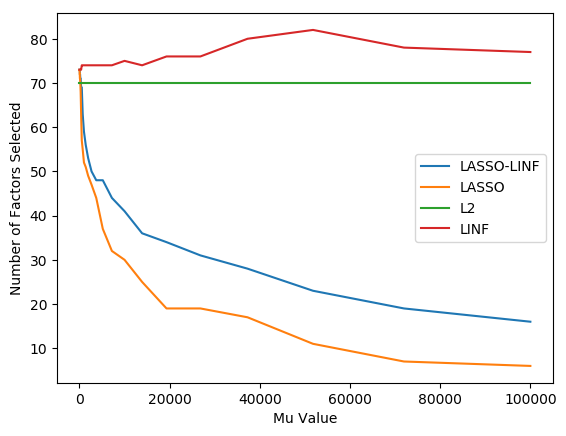

In [95]:
PyPlot.plot(mus, num_selected_1, label = "LASSO-LINF")
PyPlot.plot(mus, num_selected_2, label = "LASSO")
PyPlot.plot(mus, num_selected_3, label = "L2")
PyPlot.plot(mus, num_selected_4, label = "LINF")
PyPlot.xlabel("Mu Value")
PyPlot.ylabel("Number of Factors Selected")
PyPlot.legend()
;

As we can see from this visual the LASSO and the LASSO + $L_\infty$ select a decreasing number of factors as the $\mu$ value grows. The $L_2$ and the $L_\infty$ regression do not which is to be expected because they do not promote sparsity.

Then, the cumuluative sum of coefficients over the regressions is plotted to see how each regression is choosing factors over this large set of mu values. Based on how the data is simulated, it is known that higher numbered factors in magnitude will have a larger influence on returns. We know this based on how our data was generated. So the best regression techniques should show larger sums for cumulative coefficients for higher numbered factors and small sums for lower numbered coefficients.

Next we wanted to see how well the regressions identified this, this visualization is below:

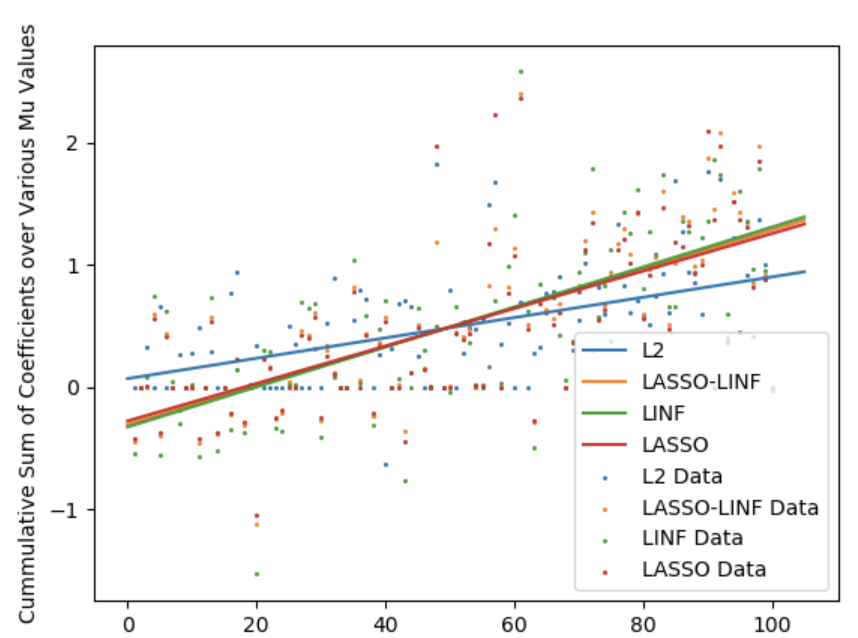



Using these visualizations and understanding of the number of factors that are selected, a single mu value is chosen at 10,000 for the remainder of the experiment to delve further into the relationships of the regressions rather than the parameters.

A regression of each type is run with the given mu value. The error, number of factors chosen by each regression, and a visual of coefficients are examined to determine which regression technique is most suitable for factor selection. Here are visualizations in both scatter plots and bar charts from each regression.

#### $L_\infty$ Regression

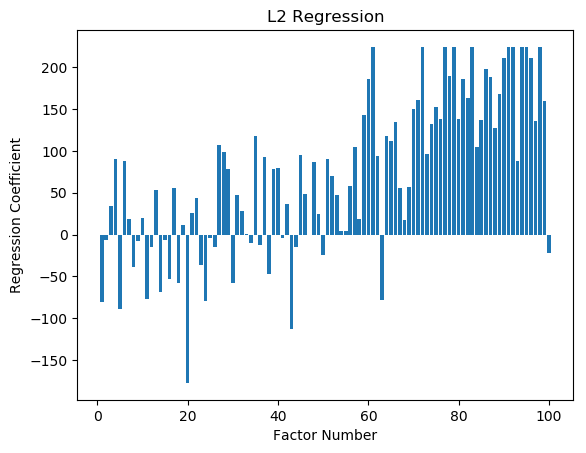

In [110]:
PyPlot.bar([i for i in 1:100],bl)
PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Regression Coefficient")
PyPlot.title("L_Infinity Regression")
;

#### LASSO Regression 

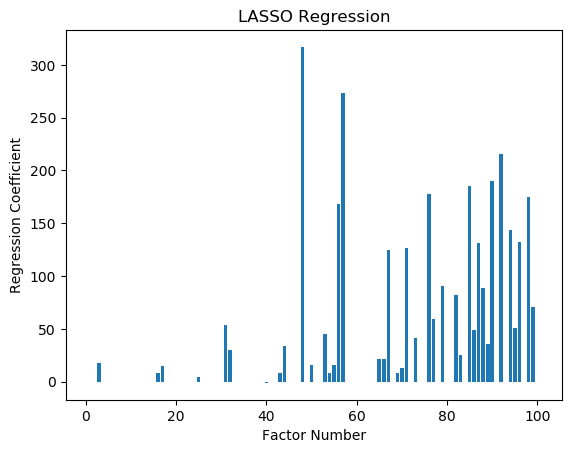

In [113]:
PyPlot.bar([i for i in 1:100],bs)
PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Regression Coefficient")
PyPlot.title("LASSO Regression")
;

#### LASSO + $L_\infty$ Regression

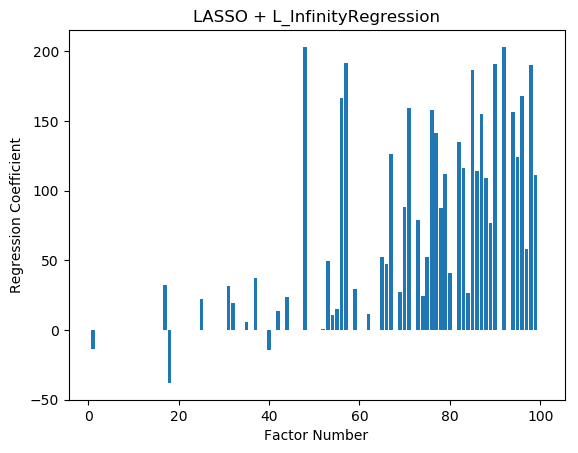

In [114]:
PyPlot.bar([i for i in 1:100],bsl)
PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Regression Coefficient")
PyPlot.title("LASSO + L_InfinityRegression")
;

#### $L_2$ Regression

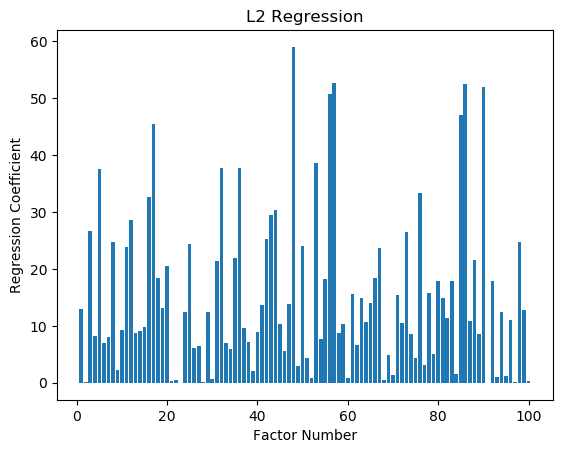

In [115]:
PyPlot.bar([i for i in 1:100],b2)
PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Regression Coefficient")
PyPlot.title("L2 Regression")
;

Here is also a scatterplot representation of these results


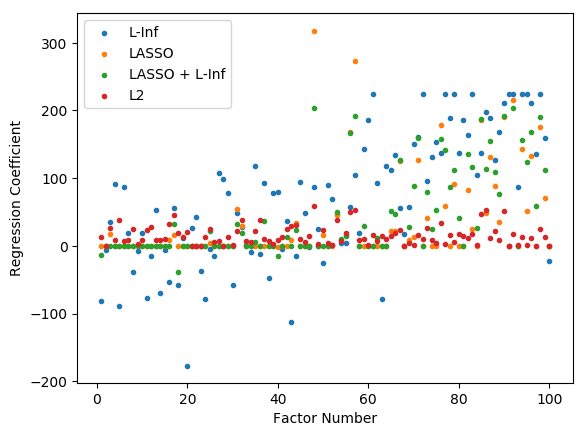

In [116]:
PyPlot.scatter([i for i in 1:length(bl)], bl, label = "L-Inf", marker = ".")
PyPlot.scatter([i for i in 1:length(bs)], bs, label = "LASSO", marker = ".")
PyPlot.scatter([i for i in 1:length(bsl)], bsl, label = "LASSO + L-Inf", marker = ".")
PyPlot.scatter([i for i in 1:length(b2)], b2, label = "L2", marker = ".")
PyPlot.xlabel("Factor Number")
PyPlot.ylabel("Regression Coefficient")
PyPlot.legend()
;

As we can see from the scatterplot and the bar charts, it is hard to distinguish whether the LASSO or LASSO + L-Inf regressions performed better. We know that the LASSO + $L_\infty$ regression is an equalized version of the lasso so they will perform similarly as expected.


Here are the number of factors chosen and error for each regression technique

In [118]:
print("\nL-Inf error:\t", getobjectivevalue(linf) - mu * maxl)
print("\nL-Inf chose:\t", linf_count," factors\n\n")
print("LASSO error:\t", getobjectivevalue(lasso) - mu * sum(ts))
print("\nLASSO chose:\t", lasso_count," factors\n\n")
print("LASSO + L-Inf error:\t", getobjectivevalue(laslin) - .5 * mu * sum(tsl) - .5 * mu *maxsl)
print("\nLASSO + L-Inf chose:\t", lasso_count," factors\n\n")
print("L2 error:\t", getobjectivevalue(l2) - mu * sum(b2.*b2))
print("\nL2 chose:\t", l2_count," factors\n\n")


L-Inf error:	4.8342488441007e7
L-Inf chose:	75 factors

LASSO error:	6.1848597109477356e7
LASSO chose:	30 factors

LASSO + L-Inf error:	5.51524970487787e7
LASSO + L-Inf chose:	30 factors

L2 error:	6.502878489250455e8
L2 chose:	68 factors



The added L-Inf term normalizes each coefficient selected by the LASSO. The most important aspect of these regressions, however, is their ability to select factors, so even though the plots may look different for the LASSO + L-Inf and just the LASSO, the LASSO + $L_\infty$ still selected the same number of factors and has lower error.

Overall, we believe the pure LASSO is the best factor selecting regression technique because of its superlative ability to select and prioritize the factors we know to have the largest impact on returns and not select those that do not. It is worth noting though, the LASSO + $L_\infty$ regression technique selectes the same number of factors as the standard LASSO and has a lower error. The reason we believe the LASSO is a better factor selecting regression is due to the way we generated the data, it is shown that the LASSO performs similary to to the LASSO + $L_\infty$ but it selects the factors with the largest impact on returns while the LASSO + $L_\infty$ does not.

## 5. Conclusion ##

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  After comparing our regression models against each other we found that the LASSO model selects the best list of factors, followed most closely by the $L_\infty$ regression combined with the LASSO.  Our LASSO model selected significantly fewer factors while still having a similar level of error to the other models, making it ideal when applying it to a vast data set.

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  Overall, we felt that our model did a pretty good job in determining the best financial factors to be chosen.  Our results showed that models that favored larger factors had more success, which is what we expected to find. 

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  In the future, it would be best to be able to apply our results to real world data in order to verify its results.  The lack of freely available market data constrained us in this regard, but to be able to prove this model's effectiveness beyond our generated data would be much more significant.  Similarly, comparing more regression techniques, and more combination combinations of regression techniques, would be beneficial to observe in order to further optimize our results.  An interesting follow up project, given someone had available historical financial market data, would be to analyze whether the factors chosen stay consistent over a great period of time.  It is entirely possible that the most influencial financial factors of success change dramatically over time, meaning that our results would only be applicable in the here and now.